<a href="https://colab.research.google.com/github/hannmnnah/EDA_BikeShare/blob/Hana/Visualization_1_HANA_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# !ls /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,321 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144786 files and d

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

# f_path = '/content/drive/My Drive/EDA_HANA/Arial\ Unicode.ttf'
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

In [4]:
import pickle
DATA_PATH = "/content/drive/My Drive/EDA_HANA"
infile = open(DATA_PATH +'/non20.pkl','rb')
non20 = pickle.load(infile)

In [5]:
# import pickle
# DATA_PATH = "/content/drive/My Drive/EDA_HANA"
# infile = open(DATA_PATH +'/yes20.pkl','rb')
# yes20 = pickle.load(infile)

In [21]:

#정류장 구-대여소 번호 데이터 gu_list 만들기
bike_stops = pd.read_csv('/content/drive/My Drive/EDA_HANA/대여소정보_2018.csv의 사본', encoding= 'utf-8')
gu_ = bike_stops['대여소_구'].unique()
gu_ls = list(gu_)
gu_ss = []
for gu in gu_ls:
    rental_no = bike_stops.groupby('대여소_구')['대여소번호'].unique().loc[gu]
    gu_ss.append({gu : rental_no})
dic_gu_ss = dict((key,d[key]) for d in gu_ss for key in d)
gu_ss_keys = list(dic_gu_ss.keys())
gu_ss_value = list(dic_gu_ss.values())
gu_list = list(zip(gu_ss_keys,gu_ss_value))


In [7]:
dic_gu_ss['마포구']

array([ 154,  113,  411,  125,  152,  103,  101,  108,  148,  424,  104,
        145,  421,  401,  413,  124,  142,  111,  412,  184,  199,  432,
        126,  129,  402,  156,  419,  405,  153,  107,  151,  426,  417,
        147,  418,  144,  121,  130,  114,  415,  136,  186,  403,  183,
        181,  414,  112,  422,  102,  155,  106,  407,  119,  122,  150,
        105,  425,  416,  400,  146,  409, 1687,  143,  427,  420,  185,
        410,  406,  182,  408,  120,  118,  157,  436,  437,  439])

In [8]:
non20.shape #(3378428, 14)

(3378428, 14)

In [9]:

# 광진구만 뽑아주기

non20_gwangjin = non20[non20['대여소번호'].isin(dic_gu_ss['광진구'])]
non20_gwangjin.shape #(314018, 14)


(148806, 14)

In [10]:
non20_gwangjin.tail()

,index,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
3378311,6446727,2018-12-31,11,572,572. 국립정신 건강센터 앞,정기권,M,40대,1,266.94,2.23,9630.0,NaN,61.0
3378339,6446755,2018-12-31,11,590,590. 건국대학교 (입학정보관),정기권,M,30대,1,24.39,0.2,880.0,NaN,3.0
3378346,6446807,2018-12-31,11,505,505. 자양사거리 광진아크로텔 앞,정기권,M,30대,1,16.19,0.13,560.0,NaN,2.0
3378351,6446813,2018-12-31,11,516,516. 광진메디칼 앞,정기권,M,30대,1,92.36,0.8,3430.0,NaN,16.0
3378392,6446955,2018-12-31,11,549,549. 아차산역 3번출구,정기권,M,50대,1,98.79,0.75,3240.0,NaN,55.0


In [11]:
non20_gwangjin.dtypes

index              int64
대여일자      datetime64[ns]
대여시간               int64
대여소번호              int64
대여소명              object
대여구분코드            object
성별                object
연령대코드             object
이용건수               int64
운동량               object
탄소량               object
이동거리             float64
이동시간             float64
사용시간             float64
dtype: object

In [12]:
#컬럼 정리
non20_gwangjin['구'] = '광진구'
non20_gwangjin['월'] = non20_gwangjin['대여일자'].dt.month
non20_gwangjin['일'] = non20_gwangjin['대여일자'].dt.day
non20_gwangjin['요일'] = non20_gwangjin['대여일자'].dt.dayofweek
non20_gwangjin['대여시간'] = non20_gwangjin['대여시간'].astype(str)
non20_gwangjin['시간'] = non20_gwangjin['대여시간'] + ':' + '00'
non20_gwangjin['시간'] = pd.to_datetime(non20_gwangjin['시간'], format = '%H:%M')
non20_gwangjin['시간'] = non20_gwangjin['시간'].dt.time
non20_gwangjin.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,index,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간,구,월,일,요일,시간
3378311,6446727,2018-12-31,11,572,572. 국립정신 건강센터 앞,정기권,M,40대,1,266.94,2.23,9630.0,NaN,61.0,광진구,12,31,0,11:00:00
3378339,6446755,2018-12-31,11,590,590. 건국대학교 (입학정보관),정기권,M,30대,1,24.39,0.2,880.0,NaN,3.0,광진구,12,31,0,11:00:00
3378346,6446807,2018-12-31,11,505,505. 자양사거리 광진아크로텔 앞,정기권,M,30대,1,16.19,0.13,560.0,NaN,2.0,광진구,12,31,0,11:00:00
3378351,6446813,2018-12-31,11,516,516. 광진메디칼 앞,정기권,M,30대,1,92.36,0.8,3430.0,NaN,16.0,광진구,12,31,0,11:00:00
3378392,6446955,2018-12-31,11,549,549. 아차산역 3번출구,정기권,M,50대,1,98.79,0.75,3240.0,NaN,55.0,광진구,12,31,0,11:00:00


In [13]:
# 종속변수  count 컬럼 생성
non20_gwangjin['count'] = 1
non20_gwangjin.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간,구,월,일,요일,시간,count
3378311,6446727,2018-12-31,11,572,572. 국립정신 건강센터 앞,정기권,M,40대,1,266.94,2.23,9630.0,NaN,61.0,광진구,12,31,0,11:00:00,1
3378339,6446755,2018-12-31,11,590,590. 건국대학교 (입학정보관),정기권,M,30대,1,24.39,0.2,880.0,NaN,3.0,광진구,12,31,0,11:00:00,1
3378346,6446807,2018-12-31,11,505,505. 자양사거리 광진아크로텔 앞,정기권,M,30대,1,16.19,0.13,560.0,NaN,2.0,광진구,12,31,0,11:00:00,1
3378351,6446813,2018-12-31,11,516,516. 광진메디칼 앞,정기권,M,30대,1,92.36,0.8,3430.0,NaN,16.0,광진구,12,31,0,11:00:00,1
3378392,6446955,2018-12-31,11,549,549. 아차산역 3번출구,정기권,M,50대,1,98.79,0.75,3240.0,NaN,55.0,광진구,12,31,0,11:00:00,1


In [14]:
# 쓸 컬럼만 정리
# non20_gwangjin.columns
non20_gwangjin = non20_gwangjin[['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드',
       '이용건수', '사용시간', '구', '월', '일', '요일', '시간',
       'count']]
non20_gwangjin.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,사용시간,구,월,일,요일,시간,count
3378311,2018-12-31,11,572,572. 국립정신 건강센터 앞,정기권,M,40대,1,61.0,광진구,12,31,0,11:00:00,1
3378339,2018-12-31,11,590,590. 건국대학교 (입학정보관),정기권,M,30대,1,3.0,광진구,12,31,0,11:00:00,1
3378346,2018-12-31,11,505,505. 자양사거리 광진아크로텔 앞,정기권,M,30대,1,2.0,광진구,12,31,0,11:00:00,1
3378351,2018-12-31,11,516,516. 광진메디칼 앞,정기권,M,30대,1,16.0,광진구,12,31,0,11:00:00,1
3378392,2018-12-31,11,549,549. 아차산역 3번출구,정기권,M,50대,1,55.0,광진구,12,31,0,11:00:00,1


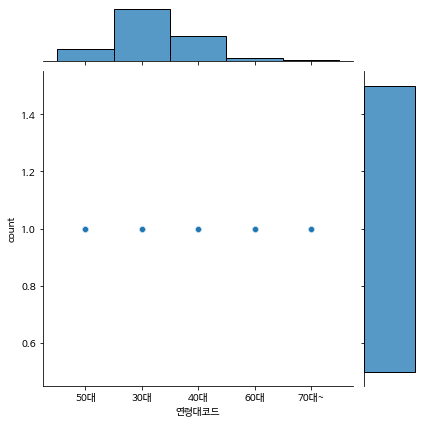

In [15]:
#한글 안깨지는지 확인

sns.jointplot(x='연령대코드',y='count', data=non20_gwangjin)
plt.show()

In [ ]:
#폰트 설정을 해줬는데도 한글이 깨져서 일단 컬럼들 이름 영어로 바꿔주기
#는 한글 데이터들도 있어서 컬럼명 바꿔주는 게 답은 아닌 것 같아 다른 방법을 찾았고, 그 다른 방법은 재시작이었다고 한다^^

# names = ['Datetime','Time(str)','stop_code','stop_name','membership','sex','age','transfer_num','ride_time','gu','Month','date','day','time(24)','count']


# non20_gwangjin.columns = names
# non20_gwangjin.tail()

,Datetime,Time(str),stop_code,stop_name,membership,sex,age,transfer_num,ride_time,gu,Month,date,day,time(24),count
3378382,2018-12-31,11,417,417. DMC역 2번출구 옆,정기권,M,50대,1,9.0,광진구,12,31,0,11:00:00,1
3378387,2018-12-31,11,121,121. 마포소방서 앞,정기권,M,60대,1,102.0,광진구,12,31,0,11:00:00,1
3378399,2018-12-31,11,421,421. 마포구청 앞,정기권,M,40대,1,69.0,광진구,12,31,0,11:00:00,1
3378400,2018-12-31,11,411,411. DMC홍보관,정기권,M,40대,1,16.0,광진구,12,31,0,11:00:00,1
3378401,2018-12-31,11,142,142. 아현역 4번출구 앞,정기권,M,50대,1,25.0,광진구,12,31,0,11:00:00,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


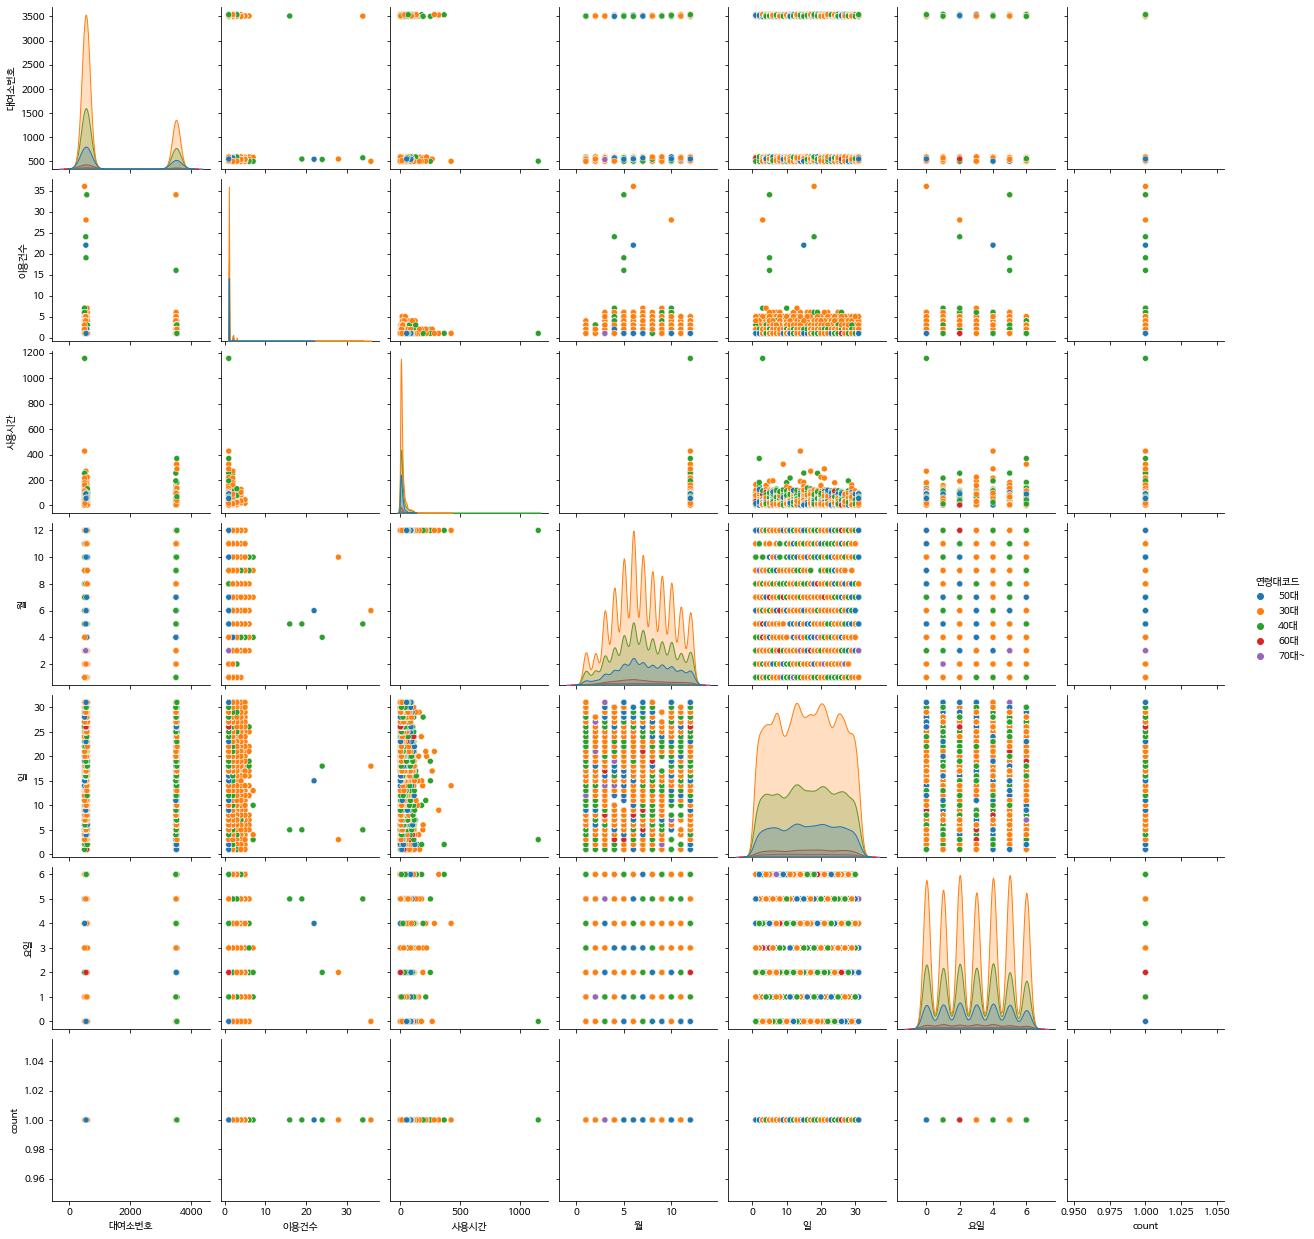

In [16]:
sns.pairplot(non20_gwangjin, hue='연령대코드')
plt.show()

In [22]:
#가설 : 정기권, 단체권, 일일권 사용자의 이용행태가 다를 것이다. (이용시간, 이용요일, 정류소)
membership = pd.pivot_table(non20_gwangjin, index=['연령대코드','대여구분코드','요일'],values=['count'],aggfunc=np.sum)
non20_gwangjin.columns
membership.reset_index(inplace=True)
membership

,연령대코드,대여구분코드,요일,count
0,30대,단체권,0,35
1,30대,단체권,1,22
2,30대,단체권,2,31
3,30대,단체권,3,14
4,30대,단체권,4,27
...,...,...,...,...
97,70대~,정기권,2,233
98,70대~,정기권,3,244
99,70대~,정기권,4,266
100,70대~,정기권,5,224


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


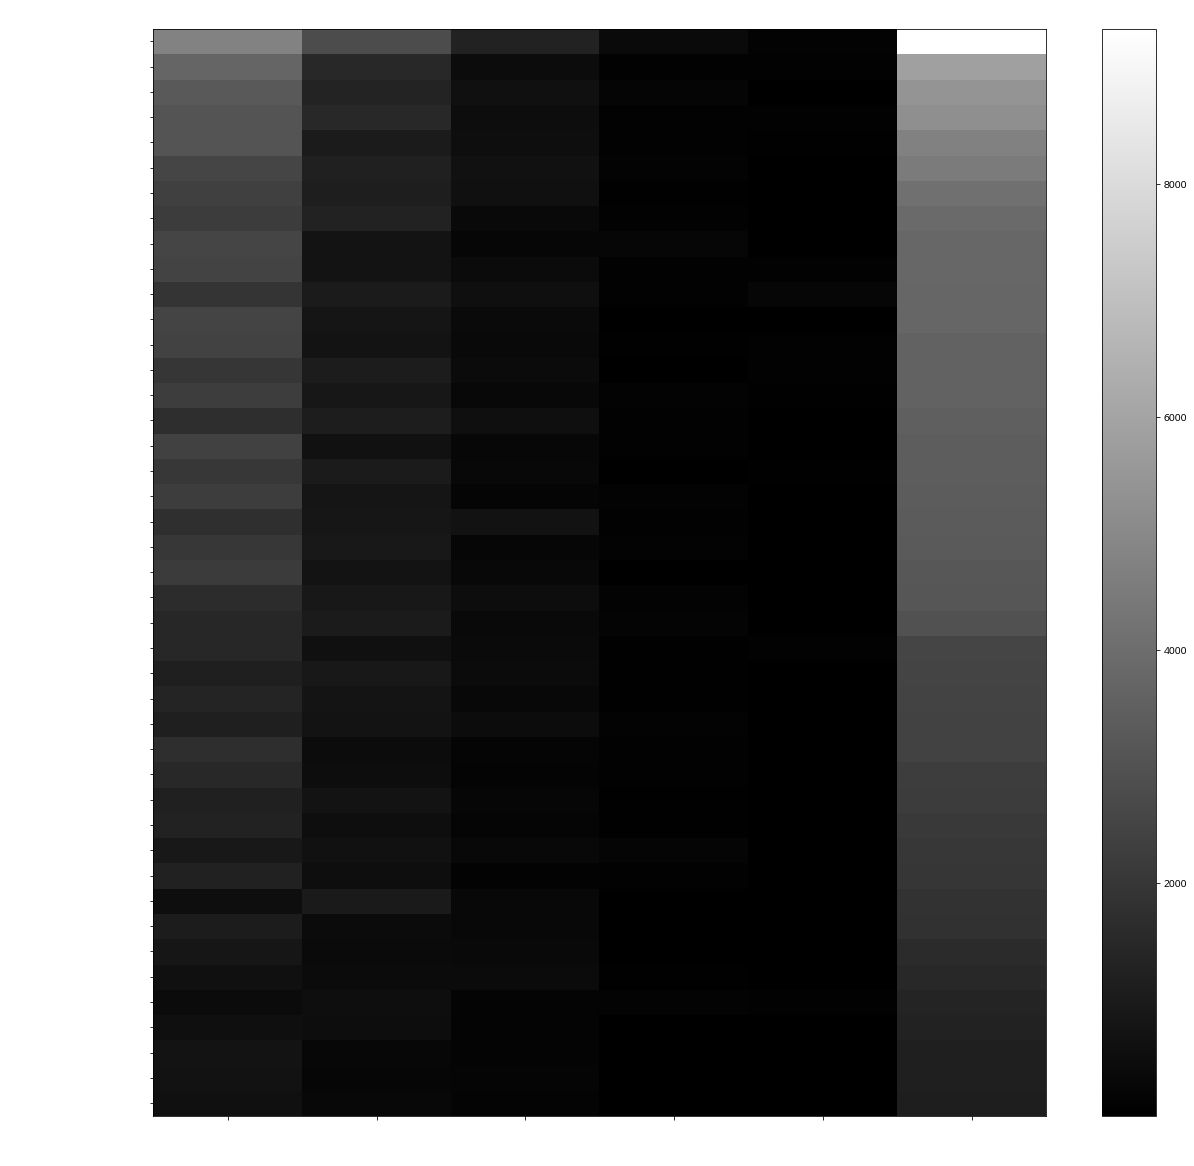

In [59]:
#연령대마다 이용하는 정류소가 다를 것이다
# age = pd.pivot_table(non20_gwangjin, index=['대여소명'],columns=['연령대코드'],values=['count'],aggfunc=np.sum, margins = True)
# age.fillna(0, inplace=True)
##컬럼이 2층인게 맘에 안들어서 그거 어떻게 변경했는지 민형기 강사님 seoul_crime pdf 확인

## 데이터에 적용 전에 get_level_values 공부하는 실험
# age_test = age
# age_test.reset_index(inplace=True)
# age_test
# re_columns = age_test.columns.get_level_values(1)
# len(re_columns) == len(age_test.columns) 

# age_test.columns = re_columns
# re_columns = ['대여소명', '30대', '40대', '50대', '60대', '70대~', 'All']
# age_test.columns
# age_test.tail()

# age = age_test.copy()
# plt.yticks(age['대여소명'])
# sns.heatmap(age)
# plt.yticks(age['대여소명'])
# plt.show()

#(구)합정동 주민센터에서 'could not convert string to float'에러 남,,왜지????인덱스 어떻게 설정하지
#인덱스 yticklabels로 해결했는데도 같은 에러나넹,,!

# age.loc[' (구)합정동 주민센터']
# age.head()
# sns.heatmap(age, yticklabels = '대여소명',annot = True)

#매니저님 처방
# age.set_index('대여소명',inplace = True)
# sns.heatmap(age) #omg 값 낮은 게 넘많아서 그래프 이상하게 나옴 , 값낮은 걸 지워보자

#까만 거를 좀 줄여보자
# sns.lmplot(data=age,x='대여소명',y='All')
# age.sort_values(by='All',ascending=False)
# age.columns
# age['All']= age['All'].astype(float)
# age.dtypes
# a = age.loc[:147]
# age = a.copy()
# age = age.loc[:147]
# age
# sns.lmplot(data=age,x='대여소명',y='All')
# age_1 = age.loc[:113]
# age_1
# age_1.sort_values(by='All',ascending=False)
# sns.lmplot(data=age_1,x='대여소명',y='All')


#all이 1000이하인거랑, 이상인 거랑 나눠서 이용행태를 봐야겠다
#그리고 같은 변수로 계속 선언하면 컴퓨터가 헷갈리는 것 같다. copy()를 사용하면 더 그런 것 같기두, 데이터 우선순위가 바뀌나?

# age_1['All'] = age_1['All'].astype(float)
# age_1.dtypes
# age_under1000 = age_1[age_1['All'] <= 1000]
# age_over1000 = age_1[age_1['All'] > 1000]
# len(age_under1000), len(age_over1000) #79,69  #광진구 71 43
# age_under1000, age_over1000
# age_under1000.set_index('대여소명',inplace = True)
# age_over1000.set_index('대여소명',inplace = True)

#히트맵 그려보나까 대여소 이용량으로 sort해줘야 보기편할 것 같다
age_over1000.sort_values('All', ascending = True, inplace = True)


#age_over1000 히트맵 그려보기, 수동으로 이것저것 조작해주는 게 편할 것 같아 seaborn말고 plt로 그리기로함
# age_over1000.set_index('대여소명', inplace=True)
# sns.heatmap(age_over1000)

plt.rcParams['figure.figsize'] = [20,20]
plt.pcolor(age_over1000, cmap='gist_gray')
plt.title('연령대에 따른 대여소별 이용 횟수(over 1000)', fontsize=20, color='w')
plt.xticks(np.arange(0.5, len(age_over1000.columns),1),age_over1000.columns, color='w')
plt.yticks(np.arange(0.5, len(age_over1000.index),1),age_over1000.index, color='w')
plt.xlabel('AGE', fontsize=20, color='w')
plt.ylabel('BIKE STOPS', fontsize=20, color='w')
plt.colorbar()
# plt.show()
plt.savefig('/content/drive/My Drive/EDA_HANA/연령대에_따른_대여소별_이용횟수(over_1000).png',facecolor = 'grey', edgecolor = 'none')
plt.show()
# plt.savefig('/content/drive/My Drive/EDA_HANA/연령대에_따른_대여소별_이용횟수(over_1000).jpeg')

## 이미지 저장 코드
# plt.savefig('temp.png')
# title and colorbar ticks and text hidden
# plt.savefig('/content/drive/My Drive/EDA_HANA/연령대에_따른_대여소별_이용횟수(over_1000).png',facecolor = 'w', edgecolor = 'none')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


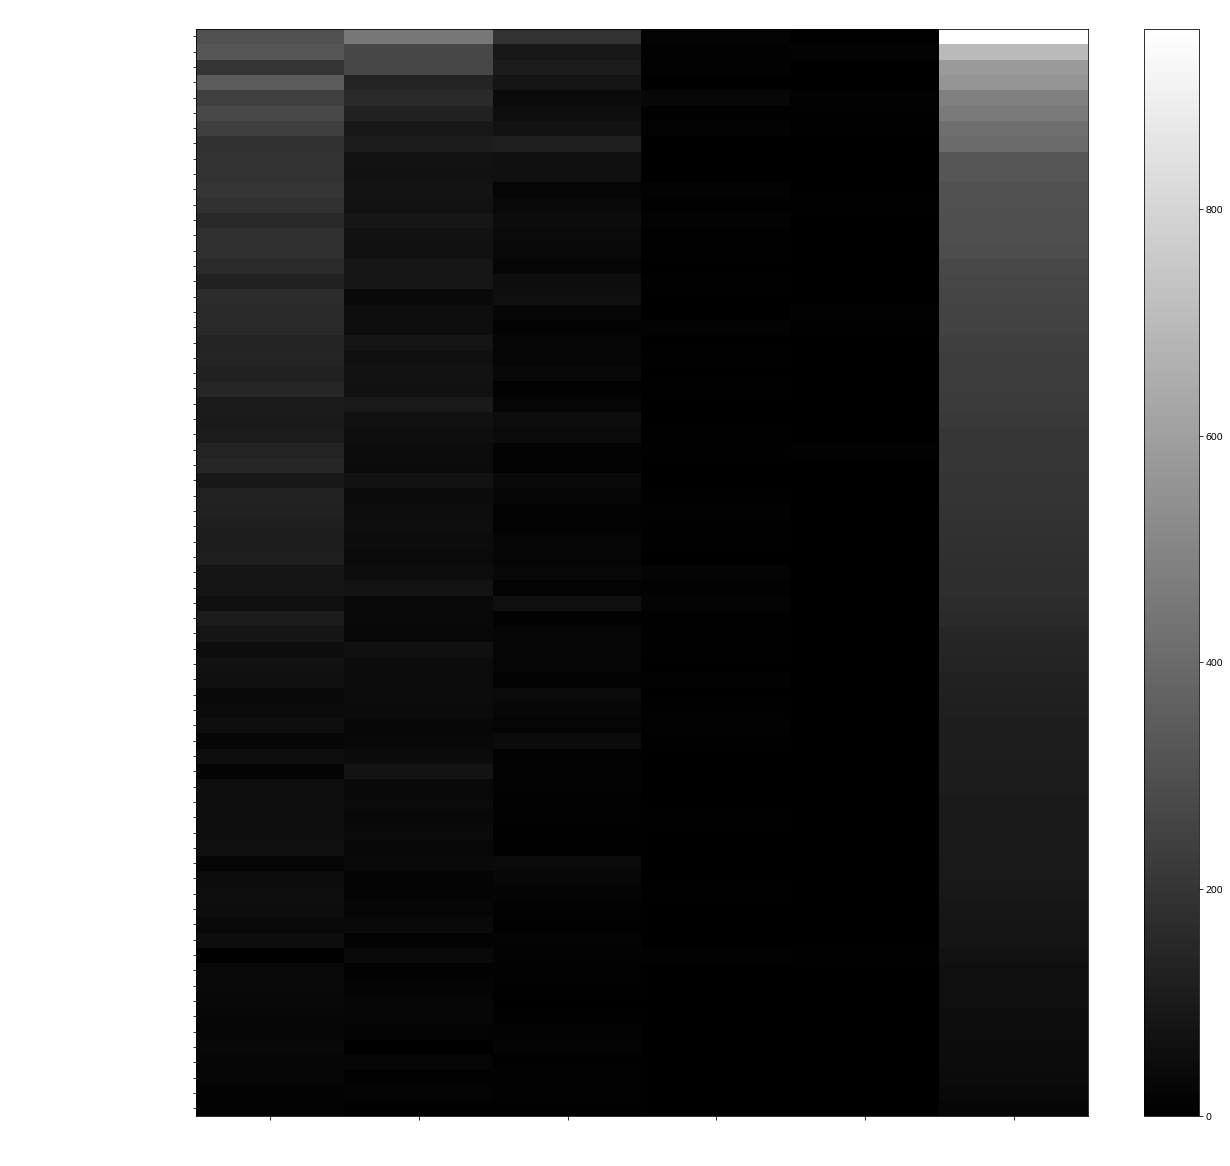

In [60]:
#age_under1000 heatmap 그려보기
age_under1000.sort_values('All', ascending = True, inplace = True)
plt.rcParams['figure.figsize'] = [20,20]
plt.pcolor(age_under1000, cmap='gist_gray')
plt.title('연령대에 따른 대여소별 이용 횟수(under 1000)', fontsize=20, color='w')
plt.xticks(np.arange(0.5, len(age_under1000.columns),1),age_under1000.columns, color='w')
plt.yticks(np.arange(0.5, len(age_under1000.index),1),age_under1000.index, color='w')
plt.xlabel('AGE', fontsize=20, color='w')
plt.ylabel('BIKE STOPS', fontsize=20, color='w')
plt.colorbar()
plt.savefig('/content/drive/My Drive/EDA_HANA/연령대에_따른_대여소별_이용횟수(under_1000).png',facecolor = 'grey', edgecolor = 'none')
plt.show()



In [24]:
#광진구 대여소들 지도에 표시해보기

In [67]:
bike_stops_g = bike_stops[bike_stops['대여소_구'] == '광진구']
wido = bike_stops_g.sort_values('위도')
wido.reset_index(drop=True, inplace = True)
# len(wido) #58
# wido

In [25]:
import folium

In [60]:
# wido.loc[3]['위도','경도']]
# wido['위도'].astype(float)
# type(location)

# lo = wido.loc[380,['위도','경도']]
# lo


# 좌표엔 float이 들어가야하네
# a =37.545178
# b = 127.081922
# type(a)

float

In [61]:
wido['위도'] = wido['위도'].astype(float)
wido['경도'] = wido['경도'].astype(float)
wido.dtypes

대여소_구     object
대여소번호      int64
대여소명      object
거치대수       int64
위도       float64
경도       float64
dtype: object

In [71]:
location = wido.loc[2,['위도','경도']]
location

위도    37.5302
경도    127.087
Name: 2, dtype: object

In [101]:
m = folium.Map(location = [37.545178,127.081922],tiles = 'cartodbpositron', zoom_start = 13)
m

# for i in range(len(wido)):
#     folium.Circle(
#         location = wido.loc[i,['위도','경도']],
#         tooltip = wido.loc[i,'대여소번호'],
#         radius  = 50
#     ).add_to(m)



In [78]:
wido
#정류소 데이터에 연간 이용량을 더해야겠다.

,대여소_구,대여소번호,대여소명,거치대수,위도,경도
0,광진구,593,자양중앙나들목,5,37.528587,127.077873
1,광진구,548,자양나들목,20,37.529770,127.074860
2,광진구,515,광양중학교 앞,10,37.530235,127.086830
3,광진구,3536,중앙농협(자양동),10,37.531811,127.080742
4,광진구,502,뚝섬유원지역 1번출구 앞,27,37.531860,127.067192
5,광진구,546,잠실대교북단 교차로,8,37.532478,127.085091
6,광진구,504,신자초교입구교차로,5,37.532970,127.075935
7,광진구,3505,신양초교앞 교차로,12,37.535221,127.068398
8,광진구,542,강변역 4번출구 뒤,19,37.535465,127.094482
9,광진구,543,구의공원(테크노마트 앞),20,37.535969,127.094673


In [138]:
# non20_gwangjin.head()
# stops_user = non20_gwangjin[['대여소명', 'count']]


#마지막까지 갔다가 중복된 대여소명 없애주고 다시 하기 ex ) '593.자양중앙나들목' 과 '자양중앙나들목'
# non20_gwangjin.reset_index(drop = True, inplace = True)
# non20_gwangjin
# type(non20_gwangjin.loc[4]['대여소명'])


# non20_gwangjin['대여소명'].replace('^\d{3,4}\.\b','',inplace = True)
non20_gwangjin.loc[148805]['대여소명']
# if non2_gwangjin.loc[i]['대여소명'] == ^[0-9]{3,4}\.\b :
#     non2_gwangjin.loc[i]['대여소명'].replace(^[0-9]{3,4}\.\b,'')
# gr = stops_user.groupby('대여소명').sum()
# len(gr)
# non20_gwangjin.groupby('대여소명')

#일단 피벗 완성
# age_stop = pd.pivot_table(non20_gwangjin, index=['대여소명'],columns = ['연령대코드'],values=['count'],aggfunc=np.sum)
# age_stop

#피벗을 어떻게 정류소 컬럼에 추가할지 커스텀

# age_stop_test = age_stop.copy()
# age_stop_test.reset_index(inplace=True)
# age_stop_test
# age_stop_test.columns.get_level_values(1)
# age_stop_test.columns.get_level_values(1)
# re_columns = ['대여소명', '30대', '40대', '50대', '60대', '70대~']
# len(re_columns) == len(age_stop_test.columns) 

# age_stop_test.columns = re_columns

# age_stop_test.fillna(0,inplace=True)
# age_stop_test.tail()

# len(wido), len(age_stop_test)
# 왜,, 두개 갯수가 다르지?

# age_stop_test['대여소명'].unique
#중복된 데이터 확인, groupby 전에 두개 합쳐줘야겠다. ex ) '593.자양중앙나들목' 과 '자양중앙나들목'




str

In [86]:
g_j_line= [
            [
              127.08068541280403,
              37.56906425519017
            ],
            [
              127.10304174249214,
              37.57076342290955
            ],
            [
              127.11519584981606,
              37.557533180704915
            ],
            [
              127.1116764203608,
              37.540669955324965
            ],
            [
              127.10087519791962,
              37.524841220167055
            ],
            [
              127.0690698130372,
              37.522279423505026
            ],
            [
              127.05867359288398,
              37.52629974922568
            ],
            [
              127.07421053024362,
              37.55724769712085
            ],
            [
              127.08068541280403,
              37.56906425519017
            ]
          ]
type(g_j_line[0][1])

float

In [94]:
folium.Polygon(locations = g_j_line,, fill = True).add_to(m)

m


In [139]:
!git add Visualization_1.ipynb

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
yes20.tail()

,index,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
2926156,6447013,2018-12-31,11,1210,1210. 롯데월드타워(잠실역2번출구 쪽),일일권,\N,20대,1,62.52,0.64,2770.0,NaN,29.0
2926157,6447014,2018-12-31,11,1318,1318. 길음역 3번출구 뒤,일일권,\N,20대,1,88.19,0.61,2620.0,NaN,31.0
2926158,6447015,2018-12-31,11,1401,1401. 극동늘푸른아파트,일일권,\N,20대,1,55.44,0.65,2800.0,NaN,13.0
2926159,6447018,2018-12-31,11,202,202. 국민일보 앞,일일권,\N,20대,1,128.66,1.68,7220.0,NaN,51.0
2926160,6447019,2018-12-31,11,923,923. 국민은행 연서지점,일일권,\N,20대,1,43.07,0.34,1450.0,NaN,9.0


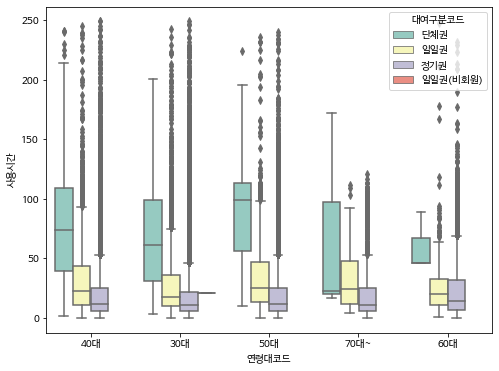

In [ ]:
membership = non20.loc[non20['사용시간'] < 250]
plt.figure(figsize=(8,6))
sns.boxplot(x='연령대코드', y='사용시간',hue='대여구분코드',data=membership ,palette='Set3')
plt.show()

#단체로 어디 멀리들 가시네

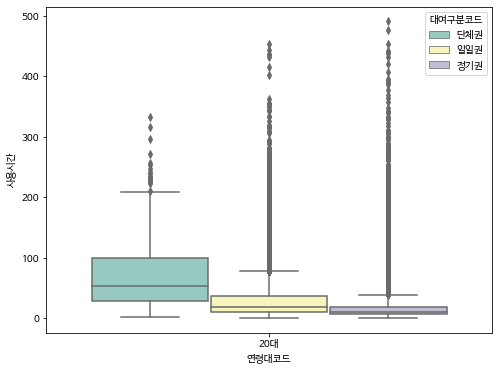

In [ ]:
membership_20= yes20.loc[yes20['사용시간'] < 500]
plt.figure(figsize=(8,6))
sns.boxplot(x='연령대코드', y='사용시간',hue='대여구분코드',data=membership_20 ,palette='Set3')
plt.show()

#단체권이 가장 오래 사용하네

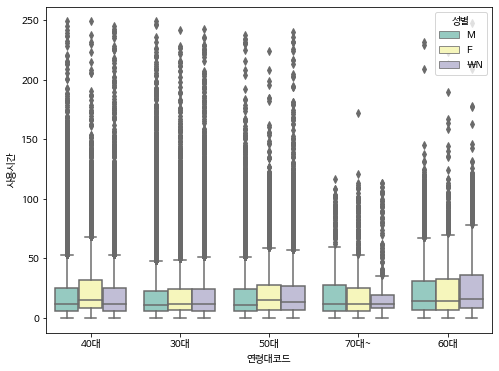

In [ ]:
membership = non20.loc[non20['사용시간'] < 250]
plt.figure(figsize=(8,6))
sns.boxplot(x='연령대코드', y='사용시간',hue='성별',data=membership ,palette='Set3')
plt.show()
#성별 차이는 없다

In [140]:
#test git